__Batch- February Phase 2 OIB-SIP__ 

Internship-Data Science

RAJSHREE PRAJAPATI


__TASK 5__

__Problem Statement:__

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.
Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

__SALES PREDICTION__

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
ad= pd.read_csv('Advertising.csv')

In [3]:
ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
ad.drop('Unnamed: 0', axis=1, inplace= True)

In [5]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
ad.shape

(200, 4)

In [7]:
ad.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

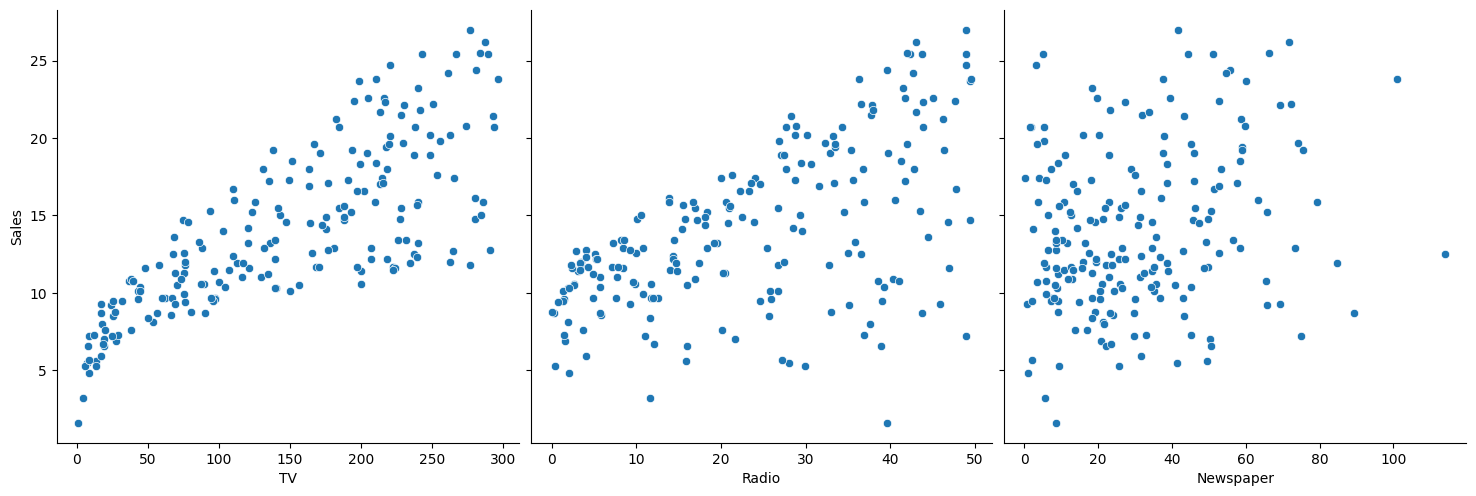

In [8]:
sns.pairplot(ad, x_vars=[ 'TV', 'Radio', 'Newspaper' ], y_vars = ['Sales'], size = 5, kind = 'scatter' )
plt.show()

In [9]:
correlation= ad.corr()
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


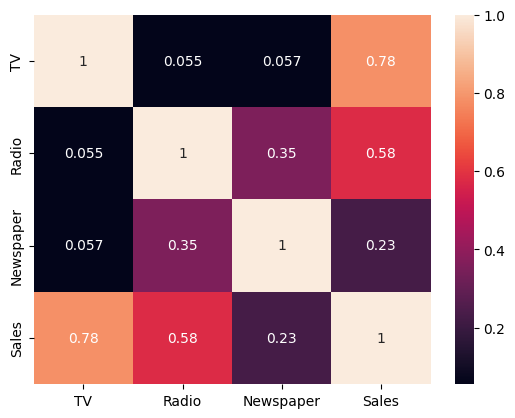

In [10]:
sns.heatmap(correlation, annot= True)
plt.show()

In [11]:
X= ad.iloc[:,0:3].to_numpy()
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [12]:
Y= ad['Sales'].to_numpy()

In [13]:
y= Y.reshape(-1,1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.75, test_size = 0.25, random_state =  42)

__LINEAR REGRESSION MODEL__

In [15]:
from sklearn.linear_model import LinearRegression
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred_lin_train= Linear_Regression.predict(X_train)
y_pred_lin_test= Linear_Regression.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score_lin_train=r2_score( y_train, y_pred_lin_train)
r2_score_lin_test=r2_score( y_test, y_pred_lin_test )
print( "MSE: ", mean_squared_error( y_test, y_pred_lin_test ) )
print("R-squared_train: ",r2_score_lin_train )
print( "R-squared_test: ",r2_score_lin_test )
print("RMSE: ", np.sqrt( mean_squared_error( y_test, y_pred_lin_test )))

MSE:  2.880023730094189
R-squared_train:  0.8966445527601498
R-squared_test:  0.8935163320163659
RMSE:  1.697063266379362


__DECISION TREE REGRESSOR__

In [18]:
from sklearn.tree import DecisionTreeRegressor
Decision_T= DecisionTreeRegressor()
Decision_T.fit(X_train, y_train)

DecisionTreeRegressor()

In [19]:
y_pred_dt_train= Decision_T.predict(X_train)
y_pred_dt_test= Decision_T.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score_dt_train=r2_score( y_train, y_pred_dt_train)
r2_score_dt_test=r2_score( y_test, y_pred_dt_test )
print( "MSE: ", mean_squared_error( y_test, y_pred_dt_test ) )
print("R-squared_train: ",r2_score_dt_train) 
print( "R-squared_test: ", r2_score_dt_test)
print("RMSE: ", np.sqrt( mean_squared_error( y_test, y_pred_dt_test )))

MSE:  2.023400000000001
R-squared_train:  1.0
R-squared_test:  0.9251884449608202
RMSE:  1.4224626532883038


__RANDOM FOREST REGRESSOR__

In [21]:
from sklearn.ensemble import RandomForestRegressor
Random_F= RandomForestRegressor()
Random_F.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
y_pred_rf_train= Random_F.predict(X_train)
y_pred_rf_test= Random_F.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score_rf_train= r2_score( y_train, y_pred_rf_train)
r2_score_rf_test= r2_score( y_test, y_pred_rf_test ) 
print( "MSE: ", mean_squared_error( y_test, y_pred_rf_test ) )
print("R-squared_train: ",r2_score_rf_train) 
print( "R-squared_test: ",r2_score_rf_test)
print("RMSE: ", np.sqrt( mean_squared_error( y_test, y_pred_rf_test )))

MSE:  0.47886517999999917
R-squared_train:  0.9961622654593297
R-squared_test:  0.9822948261490972
RMSE:  0.6920008526006303


__HYPERPARAMETER TUNING__

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
parameters= {'max_depth': [2,5,10,15,20], 
             'min_samples_leaf': [2,5,10,15], 
             'n_estimators': [50,100,150,200,300]}
grid_search= GridSearchCV( estimator= Random_F, param_grid= parameters, cv=4, n_jobs=-1, scoring='accuracy')


In [26]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20],
                         'min_samples_leaf': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='accuracy')

In [27]:
best_parameter= grid_search.best_params_
best_parameter

{'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 50}

In [28]:
Random_F= RandomForestRegressor(max_depth=2, min_samples_leaf= 2, n_estimators=50)
Random_F.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, min_samples_leaf=2, n_estimators=50)

In [29]:
y_pred_randomf_train= Random_F.predict(X_train)
y_pred_randomf_test= Random_F.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score_randomf_train=r2_score( y_train, y_pred_randomf_train)
r2_score_randomf_test=r2_score( y_test, y_pred_randomf_test )
print( "MSE: ", mean_squared_error( y_test, y_pred_randomf_test ) )
print("R-squared(for train data): ",r2_score_randomf_train) 
print( "R-squared(for test data): ",r2_score_randomf_test )
print("RMSE: ", np.sqrt( mean_squared_error( y_test, y_pred_randomf_test )))

MSE:  3.051483162128787
R-squared(for train data):  0.8596924203678503
R-squared(for test data):  0.8871769296556647
RMSE:  1.7468494961297574


__The hyperparameter tuned Random Forest Model yielded a R2 score of 0.88 for the test data. Thank You!__